# Дисбаланс классов

— это ситуация, при которой один класс представлен значительно больше, чем другой.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Методы решения:

- Under-sampling - уменьшение количества объектов доминирующего класса.
- Over-sampling - увеличение количества объектов малого класса.
- Комбинация under-sampling и over-sampling.
- Ансамбли

Все методы ниже есть в imblearn:

https://imbalanced-learn.org/stable/introduction.html

In [ ]:
df = pd.read_csv('loan_data.csv', sep=',')
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


<Axes: xlabel='loan_status', ylabel='Count'>

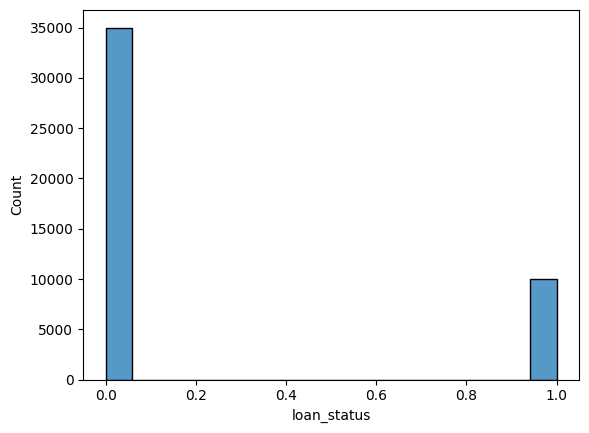

In [ ]:
sns.histplot(df["loan_status"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()

df["person_gender"] = lab_encoder.fit_transform(df["person_gender"])
df["previous_loan_defaults_on_file"] = lab_encoder.fit_transform(df["previous_loan_defaults_on_file"])
df = pd.get_dummies(df, columns = ['person_education'], prefix = '', prefix_sep = '', drop_first = True)
df = pd.get_dummies(df, columns = ['person_home_ownership'], prefix = '', prefix_sep = '', drop_first = True)
df = pd.get_dummies(df, columns = ['loan_intent'], prefix = '', prefix_sep = '', drop_first = True)

df.head(3)

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,High School,Master,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_samples=0.15, max_features=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RF: F1 = ', metrics.f1_score(y_test, y_pred))

RF: F1 =  0.8176645895421295


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.95],
                           class_sep=0.1,
                           random_state=42)

X = pd.DataFrame(X, columns =['varA', 'varB'])
y = pd.Series(y)

In [ ]:
def show_sampled_scatter(data_X, data_y, sampled_data_X, sampled_data_y, title_2):

    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title('Исходный датасет')
    sns.scatterplot(data=data_X, x="val1", y="val2", hue=data_y, ax=ax1)
    # второй график
    ax2.set_title(title_2)
    sns.scatterplot(data=sampled_data_X, x="val1", y="val2", hue=sampled_data_y, ax=ax2)
    plt.show()

In [ ]:
def make_data():
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.95],
                           class_sep=0.1,
                           random_state=33)

    # Преобразуем в pandas DataFrame
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)

    return X, y

In [ ]:
def show_sampled_scatter(orig_data_X, orig_data_y, sampled_data_X, sampled_data_y, title_2):

    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title('Исходный датасет')
    sns.scatterplot(data=orig_data_X, x="varA", y="varB", hue=orig_data_y, ax=ax1)
    # второй график
    ax2.set_title(title_2)
    sns.scatterplot(data=sampled_data_X, x="varA", y="varB", hue=sampled_data_y, ax=ax2)
    plt.show()

In [ ]:
orig_data_X, orig_data_y = make_data()

In [ ]:
data_y.value_counts()

,count
0,945
1,55


## Under-sampling


Методы Under-sampling можно разделить на две группы:

* Контролируемые - уменьшают количество объектов доминирующего класса до определённого количества, заданного пользователем.
* Очищающие - уменьшают количество объектов доминирующего класса на основании каких-либо критериев.

### Random Under-sampling

Объекты удаляются случайным образом

+ Простой и быстрый метод.

- Могут удаляться важные для классификации объекты, например те, которые могли бы быть "опорными векторами" в методе SVM.

<Axes: xlabel='loan_status', ylabel='Count'>

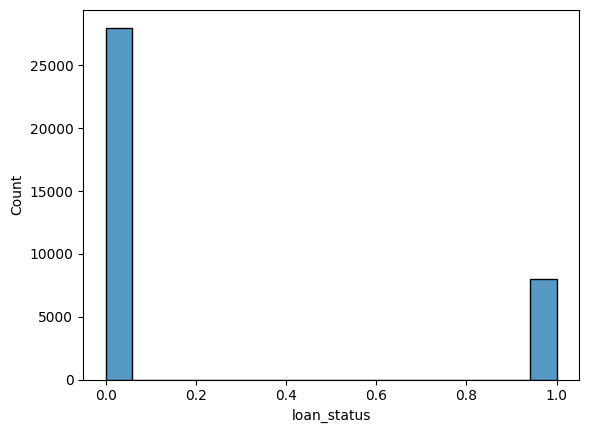

In [ ]:
sns.histplot(y_train)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

randomUnderSampler = RandomUnderSampler(sampling_strategy='auto', random_state=1, replacement=True)
random_X, random_y = randomUnderSampler.fit_resample(X_train, y_train)

<Axes: xlabel='loan_status', ylabel='Count'>

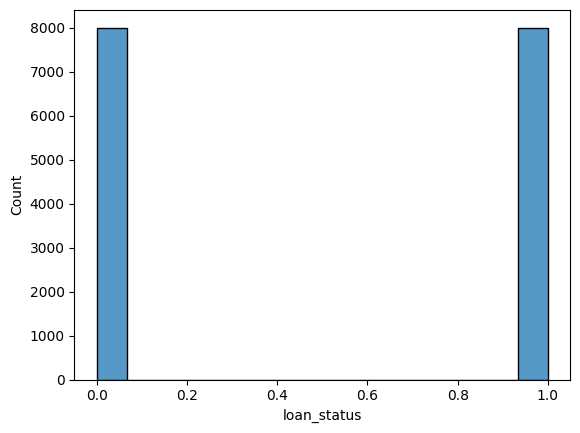

In [ ]:
sns.histplot(random_y)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_samples=0.15, max_features=5, random_state=42)
rf.fit(random_X, random_y)

y_pred = rf.predict(X_test)
print('RF: F1 = ', metrics.f1_score(y_test, y_pred))

RF: F1 =  0.7781077641069156


### Condensed Nearest Neighbours (CNN)

Оставляет точки мажорного класса рядом с точками минорного класса, что гипотетически сохраняет информацию. Долго работает.

### Tomek Links

В каждой паре ближайших соседей из разных классов удаляем или только объект доминирующего класса, или оба объекта. Это расширяет пространство между классами, что позволяет более четко их выделять.

### One Sided Selection

Последовательно применяет методы Condensed Nearest Neighbours (CNN) и Tomek Links.

### Edited Nearest Neighbours

Для каждого объекта из major-класса применяется метод ближайших соседей; если все соседи принадлежат к одному классу, то объект остается, иначе объект удаляется. Расширяет "разделяющую полосу" между классами, что позволяет более четко выделять классы.

### Repeated Edited Nearest Neighbours

Предыдущий метод повторяется до тех пор, пока не появляется новых данных для удаления, или не достигнуто максимальное количество итераций.

### All KNN

Предыдущий метод, но на каждой итерации число ближайших соседей увеличивается на 1.

### Instance Hardness Threshold

- Строит предсказание на основе модели классификации с использованием кросс-валидации (по умолчанию 5 фолдов).
- Оставляет правильно предсказанные объекты major-класса с наиболее высокими вероятностями предсказания.
- Могут использоваться различные модели классификации, по умолчанию применяется случайный лес.


In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold

iht = InstanceHardnessThreshold(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    sampling_strategy='auto',
    random_state=1,
    n_jobs=-1, cv=3)
iht_X, iht_y = iht.fit_resample(orig_data_X, orig_data_y)

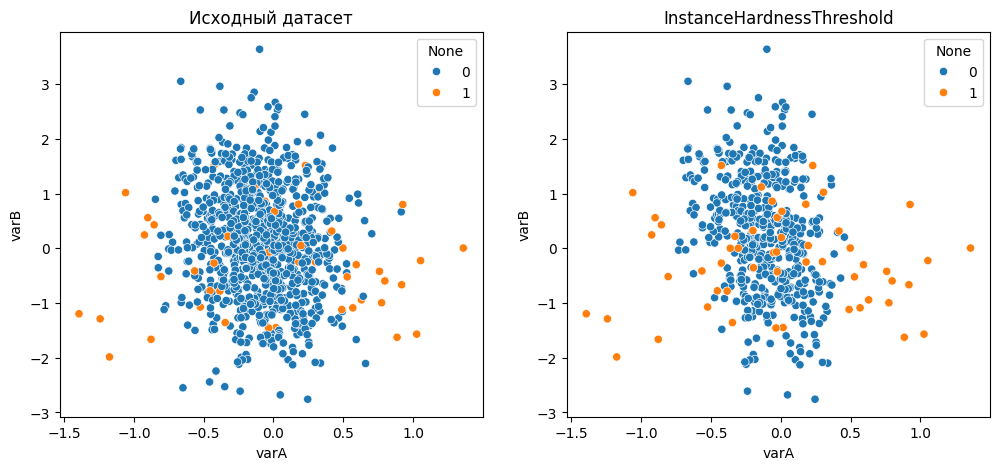

In [ ]:
show_sampled_scatter(orig_data_X, orig_data_y, iht_X, iht_y, 'InstanceHardnessThreshold')

In [135]:
iht_y.value_counts()

,count
0,515
1,53


## Over-sampling

- Методы данной группы необходимо применять при очень малых объемах minor-класса.
- Следует сделить за тем, чтобы не менялись распределения признаков.

### Synthetic Minority Over-sampling Technique (SMOTE)

- Для произвольного объекта выбираются ближайшие соседи.
- Для каждой пары объект-сосед генерируется новый объект между ними.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(
    sampling_strategy='auto',
    random_state=1,
    k_neighbors=5
)
sm_X, sm_y = sm.fit_resample(orig_data_X, orig_data_y)

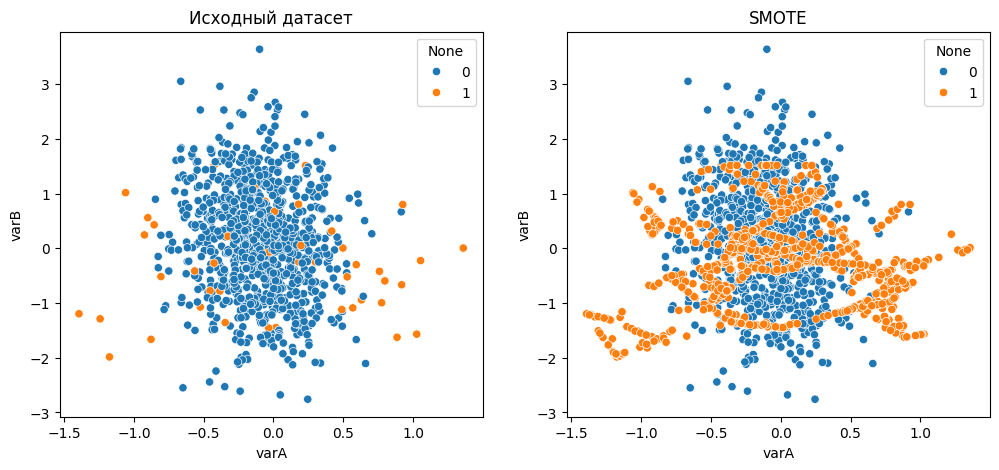

In [ ]:
show_sampled_scatter(orig_data_X, orig_data_y, sm_X, sm_y, 'SMOTE')

In [ ]:
sm_y.value_counts()

,count
0,947
1,947


### Borderline-SMOTE

Расширение SMOTE, которое использует для создания новых объектов только те объекты minor-класса, которые располагаются недалеко от границы с major-классом.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',
    random_state=1,
    k_neighbors=5,
    m_neighbors=3
)
sm_b1_X, sm_b1_y = sm_b1.fit_resample(orig_data_X, orig_data_y)

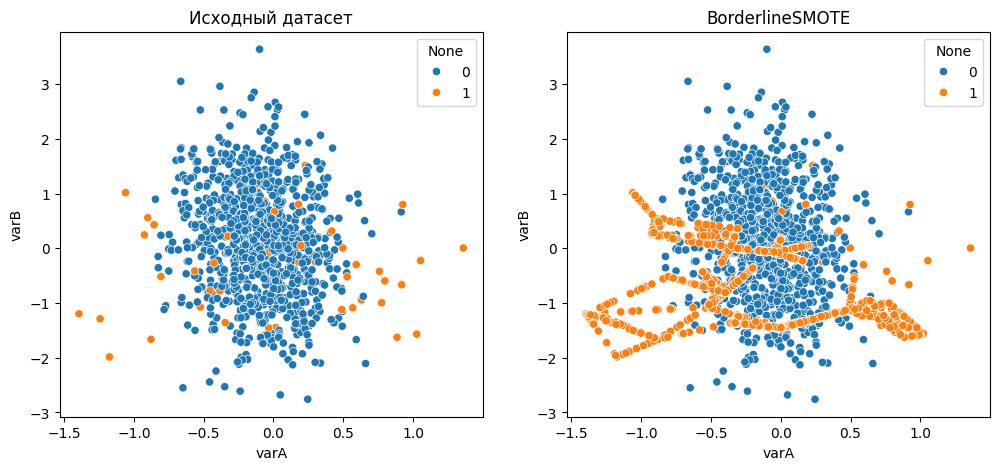

In [ ]:
show_sampled_scatter(orig_data_X, orig_data_y, sm_b1_X, sm_b1_y, 'BorderlineSMOTE')

In [ ]:
sm_b2_y.value_counts()

,count
0,947
1,947


### KMeansSMOTE

Расширение SMOTE на основе кластеризации (KMeans). Описание работы метода приведено в [статье.](https://arxiv.org/abs/1711.00837)

- Осуществляется поиск кластеров с использованием алгоритма KMeans (количество кластеров К задается как гиперпараметр).
- Определяется плотность кластеров, на основе плотности вычисляется количество генерируемых объектов в каждом кластере.
- Новые объекты внутри кластеров генерируются с помощью SMOTE.

In [ ]:
from sklearn.cluster import KMeans
from imblearn.over_sampling import KMeansSMOTE

kms_sm = KMeansSMOTE(
    sampling_strategy='auto',
    random_state=1,
    k_neighbors=2,
    n_jobs=-1,
    kmeans_estimator=KMeans(n_clusters=5, random_state=1),
    cluster_balance_threshold=0.01,
    density_exponent='auto'
)
kms_sm_X, kms_sm_y = kms_sm.fit_resample(orig_data_X, orig_data_y)

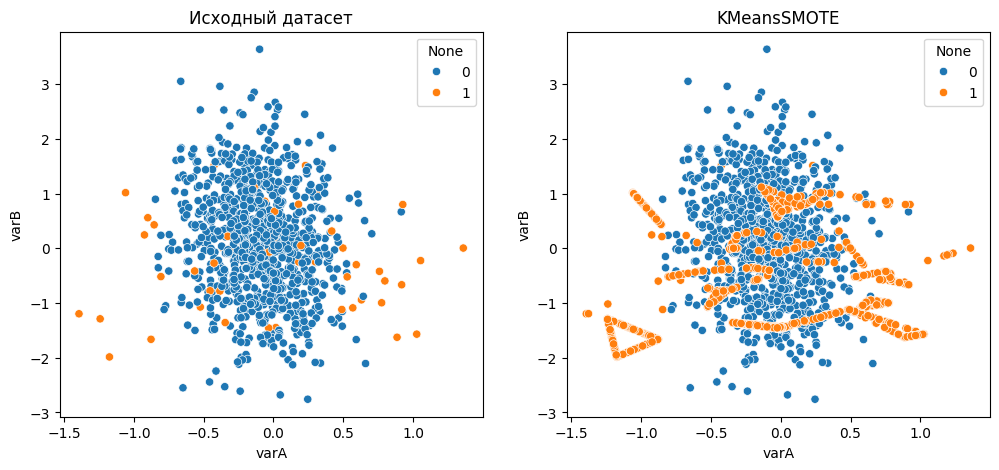

In [ ]:
show_sampled_scatter(orig_data_X, orig_data_y, kms_sm_X, kms_sm_y, 'KMeansSMOTE')

### Расширения SMOTE для работы с категориальными переменными

- Если все переменные являются категориальными, то можно использовать класс [SMOTE-N.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)
- Для смешанного датасета, который содержит как числовые, так и категориальные переменные, можно использовать класс [SMOTE-NC.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html)
- Выбираются категории, которые наиболее часто встречаются у соседей.

### Adaptive Synthetic algorithm (ADASYN)

In [119]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(
    sampling_strategy='auto',
    random_state=1,
    n_neighbors=5
)
adasyn_X, adasyn_y = adasyn.fit_resample(orig_data_X, orig_data_y)

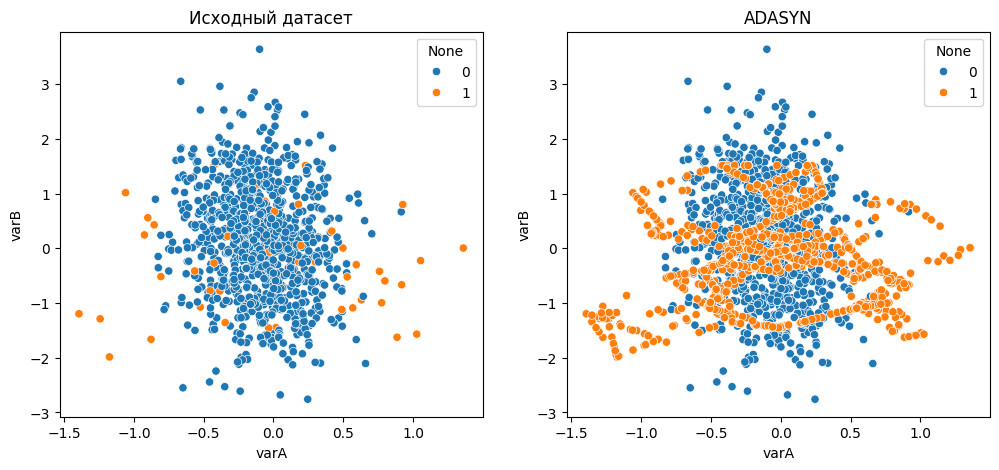

In [120]:
show_sampled_scatter(orig_data_X, orig_data_y, adasyn_X, adasyn_y, 'ADASYN')

## Одновременное использование Under-sampling и Over-sampling

Позволяет объединить преимущества обоих подходов.

Одним из наиболее частых вариантов одновременного использования методов является следующий:
1. С использованием SMOTE (или его разновидностей) можно расширить minor-класс. При этом могут быть сгенерированы "зашумленные" объекты.
2. Далее к расширенной выборке применяется метод Edited Nearest Neighbours или Tomek Links, которые устраняют "зашумленные" объекты и объекты, которые сложно классифицировать.

## Ансамблевые методы, построенные с учетом дисбалансированных выборок

In [124]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

In [123]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_samples=0.15, max_features=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('RF: F1 = ', metrics.f1_score(y_test, y_pred))

RF: F1 =  0.8176645895421295


In [129]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

BRFC = BalancedRandomForestClassifier(random_state=42, sampling_strategy=1)
BRFC.fit(X_train, y_train)

y_pred = BRFC.predict(X_test)
print('RF: F1 = ', metrics.f1_score(y_test, y_pred))

RF: F1 =  0.7872429710449014


In [132]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

RUS = RUSBoostClassifier(random_state=42)
RUS.fit(X_train, y_train)

y_pred = RUS.predict(X_test)
print('RF: F1 = ', metrics.f1_score(y_test, y_pred))

RF: F1 =  0.6276346604215457
